In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import setuptools.dist
from yellowbrick.classifier import ConfusionMatrix

In [2]:
base = pd.read_csv('insurance.csv')
base= base.dropna()
base.shape

(5319, 28)

In [3]:
base.head()

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,6,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,7,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,8,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many


In [4]:
base = base.drop(columns=['Unnamed: 0'])
base.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,Poor,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many


In [5]:
y = base.iloc[:,7].values
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [6]:
X

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Adolescent', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Adult', 'UpperMiddle', ..., True, 'Thousand', 'Many'],
       ...,
       [False, 'Adult', 'Prole', ..., True, 'Thousand', 'Many'],
       [False, 'Adult', 'UpperMiddle', ..., False, 'Thousand', 'Many'],
       [False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many']],
      dtype=object)

In [7]:
label_encoder = LabelEncoder()

In [8]:
for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = label_encoder.fit_transform(X[:,i])

In [9]:
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 0, 1, ..., 0, 3, 0],
       [0, 1, 2, ..., 1, 3, 0],
       ...,
       [0, 1, 1, ..., 1, 3, 0],
       [0, 1, 2, ..., 0, 3, 0],
       [0, 1, 1, ..., 0, 3, 0]], dtype=object)

X -> independentes
y -> variavel dependente

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
modelo = GaussianNB()
modelo.fit(x_train, y_train)

GaussianNB()

In [12]:
previsoes = modelo.predict(x_test)
previsoes

array(['Moderate', 'Moderate', 'Mild', ..., 'Severe', 'Moderate',
       'Moderate'], dtype='<U8')

In [13]:
accuracy = accuracy_score(y_test,previsoes)
precision = precision_score(y_test,previsoes, average='weighted')
recall = recall_score(y_test,previsoes, average='weighted')
f1 = f1_score(y_test,previsoes, average='weighted')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1: {f1*100:.2f}%')

Accuracy: 55.08%
Precision: 78.95%
Recall: 55.08%
F1: 46.12%


In [14]:
report = classification_report(y_test,previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.95      0.87      0.91       423
    Moderate       0.41      0.96      0.57       497
      Severe       0.97      0.05      0.10       676

    accuracy                           0.55      1596
   macro avg       0.78      0.63      0.53      1596
weighted avg       0.79      0.55      0.46      1596



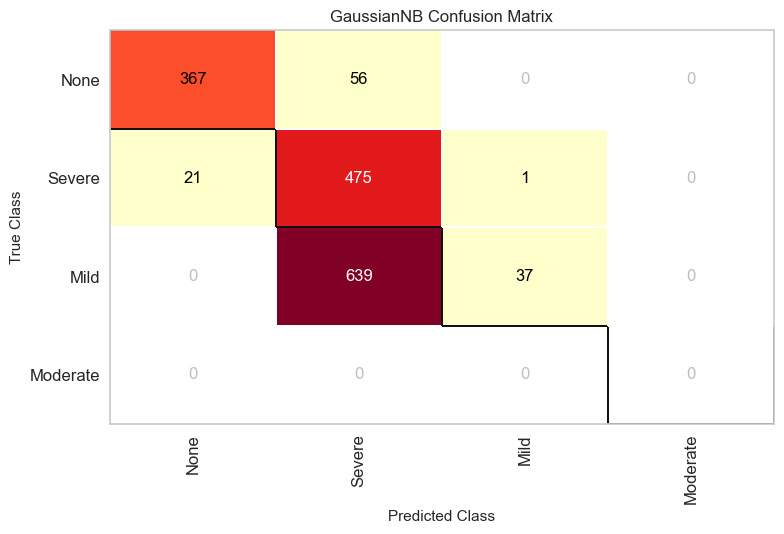

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
confusao = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
confusao.fit(x_train, y_train)
confusao.score(x_test, y_test)
confusao.poof()
